In [29]:
%matplotlib inline

import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd
import missingno as msno
import os
from scipy import stats
from scipy.stats import pearsonr
sns.set(color_codes=True)
import statsmodels.api as sm  
from statsmodels.formula.api import ols
from sklearn import linear_model
%matplotlib inline

In [30]:
#Agency AGYSUB TEXT
#Location LOC TEXT
#Age AGELVL TEXT
#Education Level EDLVL TEXT
#General Schedule & Equivalent Grade GSEGRD TEXT
#Length of Service LOSLVL TEXT
#Occupation OCC TEXT
#Occupation Category PATCO TEXT
#Pay Plan & Grade PPGRD TEXT
#Salary Level SALLVL TEXT
#STEM Occupations STEMOCC TEXT
#Supervisory Status SUPERVIS TEXT
#Type Appointment TOA TEXT
#Work Schedule WORKSCH TEXT
#Work Status WORKSTAT TEXT
#Date (e.g. 202109) DATECODE TEXT
#Employment EMPLOYMENT NUMERIC
#Average Salary SALARY NUMERIC
#Average Length of Service LOS NUMERIC

In [31]:
FACTDATA06= pd.read_table('FEC062021/FACTDATA_JUN2021.TXT', sep=",")
FACTDATA06

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,F,13,NaN,F,340,2,ES,ES-**,R,XXXX,2,50,F,1,202106,1,181500.0,18.0
1,AA00,11,I,15,NaN,H,905,1,ES,ES-**,R,XXXX,2,50,F,1,202106,1,181500.0,28.4
2,AA00,11,E,15,15,E,905,1,99,GS-15,Q,XXXX,2,30,F,1,202106,1,172500.0,11.8
3,AA00,11,D,15,15,D,905,1,99,GS-15,N,XXXX,8,30,F,1,202106,1,144128.0,9.8
4,AA00,11,F,15,13,E,905,1,99,GS-13,K,XXXX,8,30,F,1,202106,1,114059.0,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188918,ZS00,11,I,01,NaN,A,0301,2,99,AD-00,Q,XXXX,8,48,I,2,202106,1,173074.0,0.3
2188919,ZS00,11,C,17,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202106,1,57000.0,0.1
2188920,ZU00,11,K,17,NaN,E,0301,2,99,AD-00,Q,XXXX,8,48,F,2,202106,1,170800.0,14.1
2188921,ZU00,11,E,17,NaN,D,0301,2,99,AD-00,K,XXXX,8,38,F,1,202106,1,112930.0,8.0


In [32]:
FACTDATA09= pd.read_table('FEC092021/FACTDATA_SEP2021.TXT', sep=",")
FACTDATA09


/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,F,13,NaN,F,0340,2,ES,ES-**,S,XXXX,2,50,F,1,202109,1,192500.0,18.3
1,AA00,11,I,15,NaN,H,0905,1,ES,ES-**,R,XXXX,2,50,F,1,202109,1,187000.0,28.7
2,AA00,11,E,15,15,E,0905,1,99,GS-15,Q,XXXX,2,30,F,1,202109,1,172500.0,12.0
3,AA00,11,E,15,15,E,0905,1,99,GS-15,N,XXXX,8,30,F,1,202109,1,144128.0,10.0
4,AA00,11,F,15,13,E,0905,1,99,GS-13,K,XXXX,8,30,F,1,202109,1,114059.0,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191006,ZS00,11,I,01,NaN,A,0301,2,99,AD-00,Q,XXXX,8,48,I,2,202109,1,173074.0,0.6
2191007,ZS00,11,C,17,NaN,A,0301,2,99,AD-00,E,XXXX,8,48,F,2,202109,1,57000.0,0.3
2191008,ZS00,11,D,04,NaN,B,0301,2,99,AD-00,G,XXXX,8,48,F,2,202109,1,75500.0,2.7
2191009,ZS00,11,C,04,NaN,A,0301,2,99,AD-00,D,XXXX,8,48,F,2,202109,1,41000.0,0.1


In [33]:
FACTDATA = pd.concat ([FACTDATA06,FACTDATA09])
print(FACTDATA)


        AGYSUB LOC AGELVL EDLVL GSEGRD LOSLVL   OCC  PATCO  PP  PPGRD SALLVL  \
0         AA00  11      F    13    NaN      F   340      2  ES  ES-**      R   
1         AA00  11      I    15    NaN      H   905      1  ES  ES-**      R   
2         AA00  11      E    15     15      E   905      1  99  GS-15      Q   
3         AA00  11      D    15     15      D   905      1  99  GS-15      N   
4         AA00  11      F    15     13      E   905      1  99  GS-13      K   
...        ...  ..    ...   ...    ...    ...   ...    ...  ..    ...    ...   
2191006   ZS00  11      I    01    NaN      A  0301      2  99  AD-00      Q   
2191007   ZS00  11      C    17    NaN      A  0301      2  99  AD-00      E   
2191008   ZS00  11      D    04    NaN      B  0301      2  99  AD-00      G   
2191009   ZS00  11      C    04    NaN      A  0301      2  99  AD-00      D   
2191010   ZU00  11      K    17    NaN      E  0301      2  99  AD-00      Q   

        STEMOCC SUPERVIS TOA WORKSCH  W

In [34]:
FACTDATA .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4379934 entries, 0 to 2191010
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   AGYSUB      object 
 1   LOC         object 
 2   AGELVL      object 
 3   EDLVL       object 
 4   GSEGRD      object 
 5   LOSLVL      object 
 6   OCC         object 
 7   PATCO       int64  
 8   PP          object 
 9   PPGRD       object 
 10  SALLVL      object 
 11  STEMOCC     object 
 12  SUPERVIS    object 
 13  TOA         object 
 14  WORKSCH     object 
 15  WORKSTAT    int64  
 16  DATECODE    int64  
 17  EMPLOYMENT  int64  
 18  SALARY      float64
 19  LOS         float64
dtypes: float64(2), int64(4), object(14)
memory usage: 701.7+ MB


In [35]:
#Missing data 
FACTDATA.isnull().sum()

AGYSUB              0
LOC                 0
AGELVL              0
EDLVL            9481
GSEGRD        1281870
LOSLVL              0
OCC                 0
PATCO               0
PP                  0
PPGRD               0
SALLVL              0
STEMOCC             0
SUPERVIS            0
TOA                 0
WORKSCH             0
WORKSTAT            0
DATECODE            0
EMPLOYMENT          0
SALARY         588457
LOS                37
dtype: int64

In [36]:
#Missing data in %
FACTDATA.isnull().sum()/(len(FACTDATA))*100

AGYSUB         0.000000
LOC            0.000000
AGELVL         0.000000
EDLVL          0.216464
GSEGRD        29.266879
LOSLVL         0.000000
OCC            0.000000
PATCO          0.000000
PP             0.000000
PPGRD          0.000000
SALLVL         0.000000
STEMOCC        0.000000
SUPERVIS       0.000000
TOA            0.000000
WORKSCH        0.000000
WORKSTAT       0.000000
DATECODE       0.000000
EMPLOYMENT     0.000000
SALARY        13.435294
LOS            0.000845
dtype: float64

<AxesSubplot:>

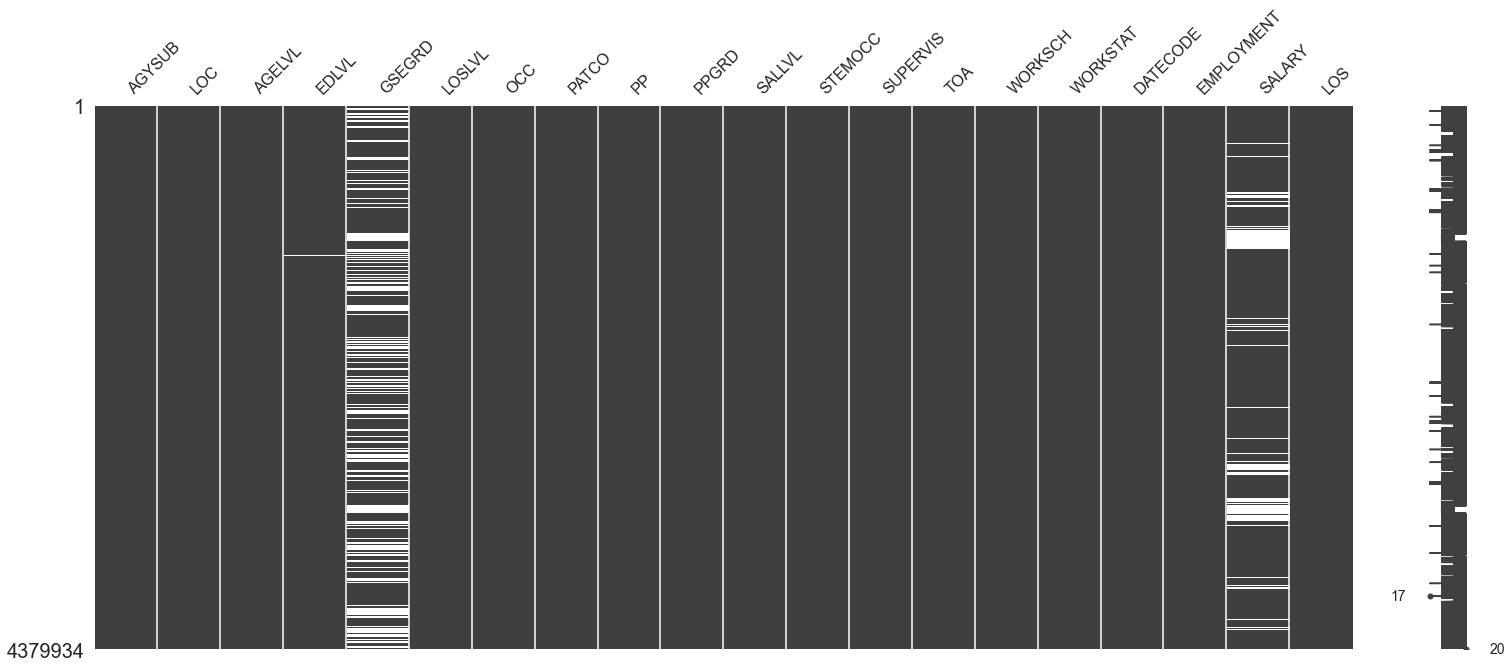

In [37]:
#Distribution of missing data
msno.matrix(FACTDATA)

In [38]:
#Count data by category Agency 202106
FACTDATA_by_Agency06 = FACTDATA06.groupby("AGYSUB")["SALARY","LOS","GSEGRD","EDLVL" ].count()
FACTDATA_by_Agency06

<ipython-input-38-339367a295cc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_Agency06 = FACTDATA06.groupby("AGYSUB")["SALARY","LOS","GSEGRD","EDLVL" ].count()


,SALARY,LOS,GSEGRD,EDLVL
AGYSUB,,,,
AA00,11,11,8,11
AB00,78,78,73,78
AF02,20,30,29,30
AF03,249,252,251,252
AF06,557,557,554,557
...,...,...,...,...
WX00,4,7,0,7
ZL00,48,48,0,48
ZP00,21,27,0,27


In [39]:
#Count data by category Agency 202109
FACTDATA_by_Agency09 = FACTDATA09.groupby("AGYSUB")["SALARY","LOS","GSEGRD","EDLVL" ].count()
FACTDATA_by_Agency09

<ipython-input-39-5881b01ffd0d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_Agency09 = FACTDATA09.groupby("AGYSUB")["SALARY","LOS","GSEGRD","EDLVL" ].count()


,SALARY,LOS,GSEGRD,EDLVL
AGYSUB,,,,
AA00,13,13,10,13
AB00,76,76,72,76
AF02,18,28,27,28
AF03,238,241,240,241
AF06,552,553,550,553
...,...,...,...,...
WX00,4,7,0,7
ZL00,47,47,0,47
ZP00,23,31,0,31


In [40]:
#Minssing data group by category Agency 202106 and 202109.
FACTDATA_by_Agency_N= FACTDATA.groupby(['AGYSUB','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS"].apply(lambda x: x.isnull().sum())

FACTDATA_by_Agency_N

<ipython-input-40-e809ddce582e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_Agency_N= FACTDATA.groupby(['AGYSUB','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS"].apply(lambda x: x.isnull().sum())


SALARY  GSEGRD  EDLVL  LOS
AGYSUB DATECODE                            
AA00   202106         0       3      0    0
       202109         0       3      0    0
AB00   202106         0       5      0    0
       202109         0       4      0    0
AF02   202106        10       1      0    0
...                 ...     ...    ...  ...
ZP00   202109         8      31      0    0
ZS00   202106         0      28      0    0
       202109         0      29      0    0
ZU00   202106         0       3      0    0
       202109         0       1      0    0

[1074 rows x 4 columns]

In [48]:
#Missing data in % on Education level, Length of Service, Average Salary and General Schedule & Equivalent Grade,
#group by Agency and date. Due to too many levels, we want to explore different category
FACTDATA_by_Agency_M= FACTDATA.groupby(['AGYSUB','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)
FACTDATA_by_Agency_M

<ipython-input-48-73bf6f320098>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_Agency_M= FACTDATA.groupby(['AGYSUB','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)


SALARY    GSEGRD  EDLVL  LOS
AGYSUB DATECODE                                
AA00   202106    0.000000  0.000068    0.0  0.0
       202109    0.000000  0.000068    0.0  0.0
AB00   202106    0.000000  0.000114    0.0  0.0
       202109    0.000000  0.000091    0.0  0.0
AF02   202106    0.000228  0.000023    0.0  0.0
...                   ...       ...    ...  ...
ZP00   202109    0.000183  0.000708    0.0  0.0
ZS00   202106    0.000000  0.000639    0.0  0.0
       202109    0.000000  0.000662    0.0  0.0
ZU00   202106    0.000000  0.000068    0.0  0.0
       202109    0.000000  0.000023    0.0  0.0

[1074 rows x 4 columns]

In [49]:
#Missing data in % on Education level, Length of Service, Average Salary and General Schedule & Equivalent Grade,
#group by Salary and date. Due to the missing data evenly distribute in the category, 
#we want to explore the different category

FACTDATA_by_SALLVL_M= FACTDATA.groupby(['SALLVL','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)

FACTDATA_by_SALLVL_M


<ipython-input-49-73c15aebe11c>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_SALLVL_M= FACTDATA.groupby(['SALLVL','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)


SALARY    GSEGRD     EDLVL       LOS
SALLVL DATECODE                                        
A      202106    0.000000  0.009270  0.000320  0.000000
       202109    0.000000  0.002740  0.000023  0.000000
B      202106    0.000411  0.195345  0.012009  0.000000
       202109    0.001849  0.189797  0.008950  0.000000
C      202106    0.186578  0.641859  0.060321  0.000000
       202109    0.209798  0.628388  0.047581  0.000023
D      202106    0.944101  1.556599  0.024978  0.000046
       202109    0.936726  1.509087  0.020525  0.000023
E      202106    0.622749  1.545617  0.007443  0.000000
       202109    0.649348  1.540366  0.006256  0.000000
F      202106    0.581607  1.447944  0.002763  0.000023
       202109    0.603548  1.452693  0.002146  0.000000
G      202106    0.401079  1.253786  0.001096  0.000023
       202109    0.421559  1.272736  0.001005  0.000023
H      202106    0.480738  1.110724  0.001096  0.000000
       202109    0.499186  1.153899  0.001027  0.000000
I      202106    0.816063  0.977914  0.000662  0.000023
       202109    0.816268  1.002937  0.000525  0.000000
J      202106    0.678914  0.877662  0.000890  0.000046
       202109    0.708002  0.886338  0.000868  0.000000
K      202106    0.588890  0.801222  0.000548  0.000000
       202109    0.613754  0.804076  0.000639  0.000000
L      202106    0.413956  0.601767  0.000731  0.000000
       202109    0.429093  0.608206  0.000708  0.000000
M      202106    0.319571  0.612589  0.000616  0.000502
       202109    0.336215  0.617498  0.000662  0.000000
N      202106    0.153427  0.413636  0.000502  0.000000
       202109    0.163770  0.418477  0.000571  0.000000
O      202106    0.103381  0.372517  0.001005  0.000114
       202109    0.114385  0.376239  0.000890  0.000000
P      202106    0.047672  0.318566  0.000297  0.000000
       202109    0.065526  0.317767  0.000320  0.000000
Q      202106    0.051690  0.468181  0.000662  0.000000
       202109    0.100458  0.464596  0.000776  0.000000
R      202106    0.017055  0.244045  0.000479  0.000000
       202109    0.017078  0.246237  0.000479  0.000000
S      202106    0.010206  0.230894  0.000023  0.000000
       202109    0.009977  0.226442  0.000023  0.000000
T      202106    0.001872  0.141692  0.000000  0.000000
       202109    0.001781  0.138518  0.000000  0.000000
U      202106    0.002489  0.190459  0.000000  0.000000
       202109    0.002397  0.190391  0.000000  0.000000
V      202106    0.000616  0.145710  0.000000  0.000000
       202109    0.000594  0.148655  0.000000  0.000000
W      202106    0.000274  0.087170  0.000000  0.000000
       202109    0.000274  0.091622  0.000000  0.000000
X      202106    0.000228  0.063585  0.000000  0.000000
       202109    0.000228  0.063700  0.000000  0.000000
Y      202106    0.000000  0.182172  0.000000  0.000000
       202109    0.000000  0.189889  0.000000  0.000000
Z      202106    0.130390  0.086919  0.001142  0.000000
       202109    0.179523  0.147742  0.004909  0.000000

In [42]:
#Occupation Category 
#Occupational categories are defined by the educational requirements of the occupation and the subject matter and level of difficulty or responsibility of the work.
#Missing data in % on Education level, Length of Service, Average Salary and General Schedule & Equivalent Grade,
#group by Occupation Category  and date.
#we can see that the majority of data were missing in PATCO 1, 2, and 6.
FACTDATA_by_OPC_M= FACTDATA.groupby(['PATCO','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)

FACTDATA_by_OPC_M

<ipython-input-42-2c22892ab043>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_OPC_M= FACTDATA.groupby(['PATCO','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)


SALARY    GSEGRD     EDLVL       LOS
PATCO DATECODE                                        
1     202106    0.467952  5.330765  0.004817  0.000571
      202109    0.630877  5.473621  0.005046  0.000023
2     202106    3.528912  3.025982  0.021507  0.000137
      202109    3.617497  3.046895  0.019430  0.000000
3     202106    1.179173  1.313901  0.046051  0.000000
      202109    1.219448  1.304906  0.037695  0.000000
4     202106    0.157811  0.188222  0.011210  0.000023
      202109    0.185688  0.205505  0.008973  0.000000
5     202106    1.203055  0.339183  0.006667  0.000023
      202109    1.197461  0.328407  0.003699  0.000023
6     202106    0.014178  4.352006  0.026256  0.000023
      202109    0.027580  4.301800  0.023083  0.000023
9     202106    0.002877  0.027786  0.001073  0.000000
      202109    0.002785  0.027900  0.000959  0.000000

In [43]:
#select data that has minimium missing value in Occupation Category which are 3, 4, 5, 9
FACTDATA_setdata = FACTDATA.loc[FACTDATA['PATCO'].isin(['3','4','5','9'])]
FACTDATA_setdata

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
55,AB00,51,J,08,9,J,303,3,99,GS-09,G,XXXX,8,10,F,1,202106,1,72154.0,38.9
91,AF02,35,F,17,8,E,318,4,99,GS-08,F,XXXX,8,10,F,1,202106,1,63290.0,14.4
146,AF03,35,H,10,9,I,318,4,99,GS-09,F,XXXX,8,10,F,1,202106,1,68107.0,33.8
169,AF03,12,H,04,7,G,303,3,99,GS-07,E,XXXX,8,10,F,1,202106,1,56790.0,23.6
198,AF03,08,H,04,7,F,303,3,99,GS-07,E,XXXX,8,10,F,1,202106,1,53248.0,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190844,VATA,04,F,10,6,C,0679,4,99,GS-06,D,XXXX,8,38,F,1,202109,1,42082.0,3.8
2190845,VATA,US,D,10,7,C,0083,5,99,GS-07,D,XXXX,8,10,F,1,202109,1,NaN,4.7
2190847,VATA,37,G,17,7,C,0679,4,99,GS-07,D,XXXX,8,38,F,1,202109,1,48420.0,3.7
2190848,VATA,04,J,10,6,C,0540,4,99,GS-06,D,XXXX,8,10,F,1,202109,1,44796.0,4.7


In [44]:
#Recheck the dataset, to make sure we only keep selected rows on PATCO
FACTDATA_by_OPC_M_test= FACTDATA_setdata.groupby(['PATCO','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)

FACTDATA_by_OPC_M_test

<ipython-input-44-775d417c1ede>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FACTDATA_by_OPC_M_test= FACTDATA_setdata.groupby(['PATCO','DATECODE'])["SALARY","GSEGRD","EDLVL","LOS" ].apply(lambda x: x.isnull().sum()/(len(FACTDATA))*100)


SALARY    GSEGRD     EDLVL       LOS
PATCO DATECODE                                        
3     202106    1.179173  1.313901  0.046051  0.000000
      202109    1.219448  1.304906  0.037695  0.000000
4     202106    0.157811  0.188222  0.011210  0.000023
      202109    0.185688  0.205505  0.008973  0.000000
5     202106    1.203055  0.339183  0.006667  0.000023
      202109    1.197461  0.328407  0.003699  0.000023
9     202106    0.002877  0.027786  0.001073  0.000000
      202109    0.002785  0.027900  0.000959  0.000000

In [45]:
FACTDATA_setdata

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
55,AB00,51,J,08,9,J,303,3,99,GS-09,G,XXXX,8,10,F,1,202106,1,72154.0,38.9
91,AF02,35,F,17,8,E,318,4,99,GS-08,F,XXXX,8,10,F,1,202106,1,63290.0,14.4
146,AF03,35,H,10,9,I,318,4,99,GS-09,F,XXXX,8,10,F,1,202106,1,68107.0,33.8
169,AF03,12,H,04,7,G,303,3,99,GS-07,E,XXXX,8,10,F,1,202106,1,56790.0,23.6
198,AF03,08,H,04,7,F,303,3,99,GS-07,E,XXXX,8,10,F,1,202106,1,53248.0,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190844,VATA,04,F,10,6,C,0679,4,99,GS-06,D,XXXX,8,38,F,1,202109,1,42082.0,3.8
2190845,VATA,US,D,10,7,C,0083,5,99,GS-07,D,XXXX,8,10,F,1,202109,1,NaN,4.7
2190847,VATA,37,G,17,7,C,0679,4,99,GS-07,D,XXXX,8,38,F,1,202109,1,48420.0,3.7
2190848,VATA,04,J,10,6,C,0540,4,99,GS-06,D,XXXX,8,10,F,1,202109,1,44796.0,4.7


In [46]:
# Drop STEM Occupations column since the data have no value to the dataset
FACTDATA_setdata1= FACTDATA_setdata.drop("STEMOCC", 1)
FACTDATA_setdata1

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
55,AB00,51,J,08,9,J,303,3,99,GS-09,G,8,10,F,1,202106,1,72154.0,38.9
91,AF02,35,F,17,8,E,318,4,99,GS-08,F,8,10,F,1,202106,1,63290.0,14.4
146,AF03,35,H,10,9,I,318,4,99,GS-09,F,8,10,F,1,202106,1,68107.0,33.8
169,AF03,12,H,04,7,G,303,3,99,GS-07,E,8,10,F,1,202106,1,56790.0,23.6
198,AF03,08,H,04,7,F,303,3,99,GS-07,E,8,10,F,1,202106,1,53248.0,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190844,VATA,04,F,10,6,C,0679,4,99,GS-06,D,8,38,F,1,202109,1,42082.0,3.8
2190845,VATA,US,D,10,7,C,0083,5,99,GS-07,D,8,10,F,1,202109,1,NaN,4.7
2190847,VATA,37,G,17,7,C,0679,4,99,GS-07,D,8,38,F,1,202109,1,48420.0,3.7
2190848,VATA,04,J,10,6,C,0540,4,99,GS-06,D,8,10,F,1,202109,1,44796.0,4.7


In [51]:
#Missing data 
FACTDATA_setdata1.isnull().sum()

AGYSUB             0
LOC                0
AGELVL             0
EDLVL           5095
GSEGRD        163626
LOSLVL             0
OCC                0
PATCO              0
PP                 0
PPGRD              0
SALLVL             0
SUPERVIS           0
TOA                0
WORKSCH            0
WORKSTAT           0
DATECODE           0
EMPLOYMENT         0
SALARY        225492
LOS                3
dtype: int64

In [50]:
#Missing data in %
FACTDATA_setdata1.isnull().sum()/(len(FACTDATA))*100

AGYSUB        0.000000
LOC           0.000000
AGELVL        0.000000
EDLVL         0.116326
GSEGRD        3.735810
LOSLVL        0.000000
OCC           0.000000
PATCO         0.000000
PP            0.000000
PPGRD         0.000000
SALLVL        0.000000
SUPERVIS      0.000000
TOA           0.000000
WORKSCH       0.000000
WORKSTAT      0.000000
DATECODE      0.000000
EMPLOYMENT    0.000000
SALARY        5.148297
LOS           0.000068
dtype: float64

In [56]:
FACTDATA_setdata1[FACTDATA_setdata1['LOS'].isnull()]


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
1172426,HSCB,13,D,13,NaN,Z,0089,5,99,IM-01,D,8,48,I,2,202106,1,44682.0,NaN
1546344,ST00,11,K,12,7,Z,0318,4,99,GS-07,F,8,20,I,2,202106,1,63906.0,NaN
1174240,HSCB,13,D,13,NaN,Z,0089,5,99,IM-01,D,8,48,I,2,202109,1,44682.0,NaN
